### 1.3

In [363]:
# import required modules

from typing import Callable

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import scipy.optimize as opt

In [364]:
# define ranges (min, max, steps)
# RANGE_X1 = (0, 4, 100)
# RANGE_X2 = (-2, 2, 100)
RANGE_X1 = (-2, 3, 1000)
RANGE_X2 = (-2, 3, 1000)

# global variables to hold intermediate values
intermediate_fx = []
intermediate_x1 = []
intermediate_x2 = []

In [365]:
# function from the problem
def function2(x: npt.ArrayLike) -> float:
    return pow((1-x[0]), 2) + pow((1-x[1]), 2) + (1/2)*pow(2*x[1] - pow(x[0], 2), 2)

In [366]:
# function to prepare the data that is going to be plotted
def prep_data(function: Callable[[float, float], float], range_x1: tuple[float, float, float], range_x2: tuple[float, float, float]) -> tuple[npt.ArrayLike, npt.ArrayLike, npt.ArrayLike]:
    x1 = np.linspace(range_x1[0], range_x1[1], range_x1[2])
    x2 = np.linspace(range_x2[0], range_x2[1], range_x2[2])
    x1, x2 = np.meshgrid(x1, x2)
    fx = function([x1, x2])
    return x1, x2, fx

In [367]:
# function to plot data
def plot_data(x1: npt.ArrayLike, x2: npt.ArrayLike, fx: npt.ArrayLike) -> None:
    _, ax = plt.subplots()
    levels = np.linspace(np.min(fx), np.max(fx), 30)
    CS = ax.contour(x1, x2, fx, levels=levels)
    ax.clabel(CS, inline=True, fontsize=10)
    plt.show()

In [368]:
# function for plotting intermediates from optimization
def plot_intermediates(fx: list[float], x1: list[float], x2: list[float], title: str):
    fig, axs = plt.subplots(2)
    fig.suptitle(title)
    
    axs[0].set_title("Function value")
    axs[0].plot(range(1, len(fx)+1), fx)
    
    axs[1].set_title("Inputs")
    axs[1].plot(range(1, len(x1)+1), x1, label="x1")
    axs[1].plot(range(1, len(x2)+1), x2, label="x2")
    axs[1].legend(loc='best', title='inputs')
    


In [369]:
# callback to be called after each iteration to see the progress of the optimizer
def intermediate_callback(intermediate_result: opt.OptimizeResult):
    intermediate_fx.append(intermediate_result.fun)
    intermediate_x1.append(intermediate_result.x[0])
    intermediate_x2.append(intermediate_result.x[1])

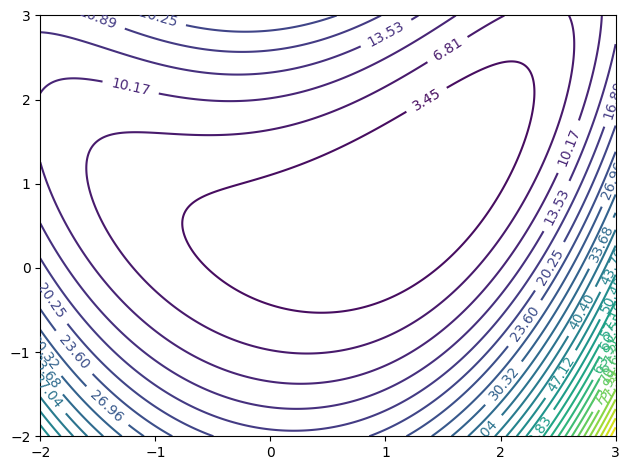

In [370]:

# plot the function contour
x1, x2, fx = prep_data(function2, RANGE_X1, RANGE_X2)
plot_data(x1, x2, fx)


Graphically:
global minimum = 0
at x1 = 1 and x2 = 0.5


Min from sampling:
fx: 0.091947781376517
x1: 1.2132132132132134
x2: 0.8228228228228227

Min from optimization:
fx: 0.09194381641124935
x1: 1.2134115413592905
x2: 0.8241225383415788


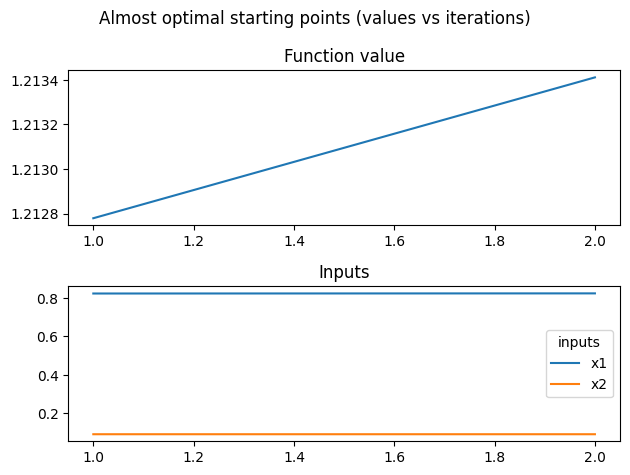

In [371]:
# optimize with almost optimal starting points
guess_fx = np.min(fx)
guess_x1 = x1[np.where(fx == np.min(fx))][0]
guess_x2 = x2[np.where(fx == np.min(fx))][0]

optimal = opt.minimize(function2, np.array([guess_x1, guess_x2]), callback=intermediate_callback)
plot_intermediates(intermediate_x1, intermediate_x2, intermediate_fx, 'Almost optimal starting points (values vs iterations)')
print(f"Min from sampling:")
print(f"fx: {guess_fx}")
print(f"x1: {guess_x1}")
print(f"x2: {guess_x2}")
print(f"\nMin from optimization:")
print(f"fx: {optimal.fun}")
print(f"x1: {optimal.x[0]}")
print(f"x2: {optimal.x[1]}")

The optimizer converges to the same minimum as the graph and sampling


Min from optimization:
fx: 0.09194381641184524
x1: 1.2134117420504809
x2: 0.8241222336480759


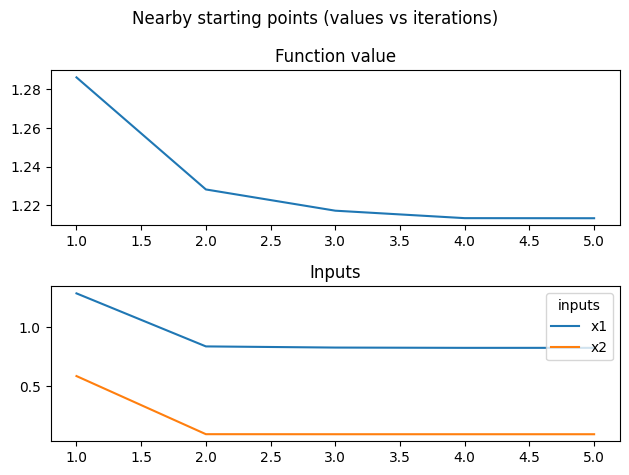

In [372]:
# optimize with nearby starting points
intermediate_x1 = []
intermediate_x2 = []
intermediate_fx = []
guess_x1 = 2
guess_x2 = 2
optimal = opt.minimize(function2, np.array([guess_x1, guess_x2]), callback=intermediate_callback)
plot_intermediates(intermediate_x1, intermediate_x2, intermediate_fx, 'Nearby starting points (values vs iterations)')

print(f"\nMin from optimization:")
print(f"fx: {optimal.fun}")
print(f"x1: {optimal.x[0]}")
print(f"x2: {optimal.x[1]}")

The optimizer converges to the same minimum as the graph and sampling


Min from optimization:
fx: 0.09194381641125884
x1: 1.213411523587456
x2: 0.8241224837807294


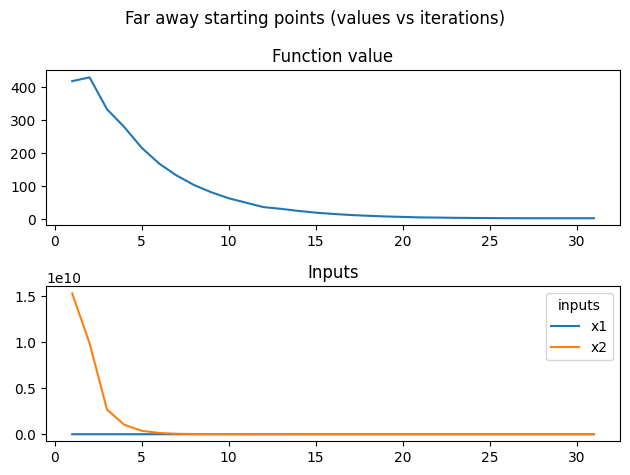

In [373]:
# optimize with far away starting points
intermediate_x1 = []
intermediate_x2 = []
intermediate_fx = []
guess_x1 = 439
guess_x2 = -126
optimal = opt.minimize(function2, np.array([guess_x1, guess_x2]), callback=intermediate_callback)
plot_intermediates(intermediate_x1, intermediate_x2, intermediate_fx, 'Far away starting points (values vs iterations)')

print(f"\nMin from optimization:")
print(f"fx: {optimal.fun}")
print(f"x1: {optimal.x[0]}")
print(f"x2: {optimal.x[1]}")

The optimizer converges to the same minimum as the graph and sampling